In [39]:
import tensorflow
tensorflow.__version__

'1.4.0'

In [40]:
import keras
keras.__version__

'2.1.0'

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.utils import np_utils

np.random.seed(100)
%matplotlib inline

In [42]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
X_train.shape

(50000, 32, 32, 3)

In [44]:
y_train.shape

(50000, 1)

In [45]:
y_train = y_train.reshape(y_train.shape[0])  #y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

In [46]:
y_train.shape

(50000,)

In [47]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [48]:
# Size of the batch
batch_size = 32
# Number of classes of images
nb_classes = 10
# Number of epochs for learning
num_epochs = 100
# Size of the images
img_rows, img_cols = 32, 32
# Number of channels in the image: RGB
img_channels = 3

In [49]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [50]:
# Convert the labels to categories
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [51]:
y_train.shape

(50000, 10)

In [14]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# The sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The seventh convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))


# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))

In [15]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [16]:
%%time
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_split=0.1,
          shuffle=True,
          verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 31s - loss: 2.2302 - acc: 0.1502 - val_loss: 2.0750 - val_acc: 0.2316
Epoch 2/100
 - 26s - loss: 2.0030 - acc: 0.2508 - val_loss: 1.8696 - val_acc: 0.3066
Epoch 3/100
 - 26s - loss: 1.8235 - acc: 0.3190 - val_loss: 1.6583 - val_acc: 0.3816
Epoch 4/100
 - 26s - loss: 1.6596 - acc: 0.3854 - val_loss: 1.4929 - val_acc: 0.4430
Epoch 5/100
 - 26s - loss: 1.5195 - acc: 0.4414 - val_loss: 1.3824 - val_acc: 0.4862
Epoch 6/100
 - 26s - loss: 1.4120 - acc: 0.4893 - val_loss: 1.4166 - val_acc: 0.4820
Epoch 7/100
 - 26s - loss: 1.3203 - acc: 0.5240 - val_loss: 1.1805 - val_acc: 0.5708
Epoch 8/100
 - 26s - loss: 1.2384 - acc: 0.5559 - val_loss: 1.2652 - val_acc: 0.5476
Epoch 9/100
 - 26s - loss: 1.1772 - acc: 0.5801 - val_loss: 1.0528 - val_acc: 0.6270
Epoch 10/100
 - 26s - loss: 1.1179 - acc: 0.6022 - val_loss: 1.0962 - val_acc: 0.6186
Epoch 11/100
 - 26s - loss: 1.0668 - acc: 0.6202 - val_loss: 0.9168 - val_acc: 0.6754
Epoch 12/100
 

Epoch 96/100
 - 26s - loss: 0.1455 - acc: 0.9489 - val_loss: 0.7260 - val_acc: 0.8280
Epoch 97/100
 - 26s - loss: 0.1428 - acc: 0.9500 - val_loss: 0.6873 - val_acc: 0.8336
Epoch 98/100
 - 26s - loss: 0.1396 - acc: 0.9526 - val_loss: 0.7016 - val_acc: 0.8340
Epoch 99/100
 - 26s - loss: 0.1479 - acc: 0.9493 - val_loss: 0.6961 - val_acc: 0.8302
Epoch 100/100
 - 26s - loss: 0.1362 - acc: 0.9534 - val_loss: 0.6871 - val_acc: 0.8286
CPU times: user 44min 36s, sys: 3min 23s, total: 47min 59s
Wall time: 43min 46s


In [17]:
model_json = model.to_json()
open('cifar10_architecture_sgd100_7L.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights_sgd100_7L.h5')

In [18]:
%%time
scores = model.evaluate(X_test, y_test, verbose=2)
print("The accuracy of test data: %.2f%%" % (scores[1]*100))

The accuracy of test data: 82.51%
CPU times: user 1.19 s, sys: 64 ms, total: 1.25 s
Wall time: 1.6 s


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


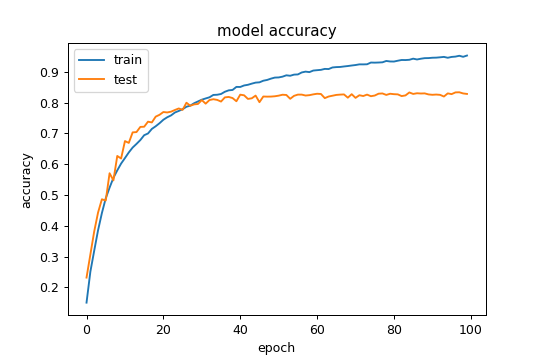

In [20]:
%matplotlib notebook
%matplotlib notebook

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


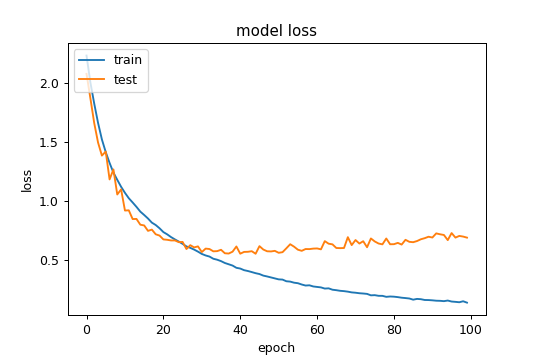

In [21]:
%matplotlib notebook
%matplotlib notebook

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[830,  18,  37,  22,   6,   3,   9,   7,  44,  24],
       [  2, 932,   2,   3,   3,   2,   5,   0,  14,  37],
       [ 41,   1, 738,  48,  53,  40,  52,   8,  14,   5],
       [ 12,   6,  45, 698,  28, 115,  67,  13,   6,  10],
       [ 10,   2,  49,  63, 790,  20,  23,  36,   7,   0],
       [ 11,   4,  25, 152,  23, 736,  17,  26,   2,   4],
       [  4,   4,  31,  36,  14,   9, 892,   2,   3,   5],
       [ 15,   1,  17,  48,  45,  33,   3, 827,   3,   8],
       [ 25,  18,   5,   8,   2,   2,   4,   1, 919,  16],
       [ 14,  67,   2,   7,   2,   2,   1,   3,  13, 889]])

In [23]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.models import model_from_json

%matplotlib inline

# Scratch Model
weights_path = 'cifar10_weights_sgd100_7L.h5'
model_path = 'cifar10_architecture_sgd100_7L.json'

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [24]:
import scipy

def preprocess_image(image_path, preprocess_input, resize_shape):
    img = load_img(image_path)
    img = img_to_array(img)
    img = scipy.misc.imresize(img, size=resize_shape)
    img = preprocess_input(img)
    return img

In [25]:
with open(model_path, 'r') as model_json:
    loaded_model = model_from_json(model_json.read())

loaded_model.load_weights(weights_path)
print("Scratch Model Loaded")

Scratch Model Loaded


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'deer')

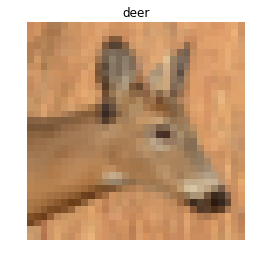

In [26]:
img = preprocess_image('images/deer.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'horse')

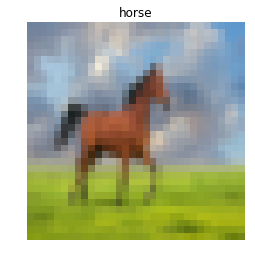

In [27]:
img = preprocess_image('images/horse.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

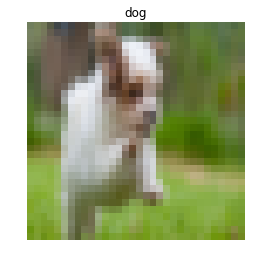

In [28]:
img = preprocess_image('images/dog.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'horse')

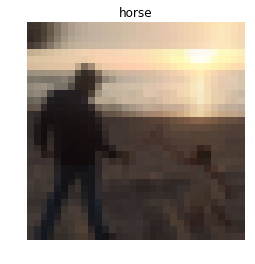

In [29]:
img = preprocess_image('images/dinesh.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

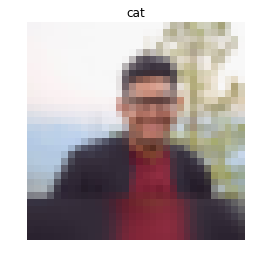

In [30]:
img = preprocess_image('images/hari.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

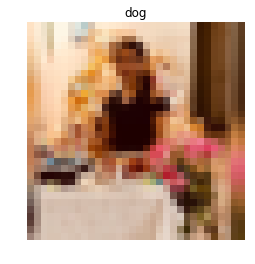

In [31]:
img = preprocess_image('images/pavani.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'automobile')

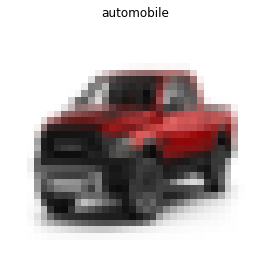

In [32]:
img = preprocess_image('images/car.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'truck')

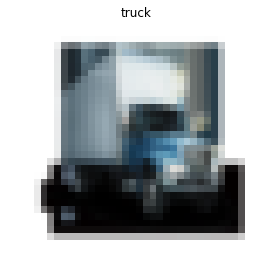

In [33]:
img = preprocess_image('images/truck.png', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

In [52]:
from keras.preprocessing.image import ImageDataGenerator

print("Augment the training dataset...")
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)

Augment the training dataset...


In [53]:
datagen.fit(X_train)

In [54]:
# Create a model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# The second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# The first pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# The fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# The second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))

# The fifth convolutional layer
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# The sixth convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The seventh convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
# The third pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout regularization layer
model.add(Dropout(0.25))


# Flatten the dataset
model.add(Flatten())
# A fully-connected layer for classification
model.add(Dense(512, activation='relu'))
# Dropout regularization layer
model.add(Dropout(0.5))

# Output/Softmax layer
model.add(Dense(nb_classes, activation='softmax'))

In [55]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [56]:
%%time
# train
history = model.fit_generator(datagen.flow(X_train, y_train,
          batch_size=batch_size), steps_per_epoch=X_train.shape[0]/batch_size,
          epochs=num_epochs, validation_data = (X_test, y_test), verbose=2)

Epoch 1/100
 - 32s - loss: 2.2332 - acc: 0.1479 - val_loss: 2.1495 - val_acc: 0.1886
Epoch 2/100
 - 30s - loss: 2.0733 - acc: 0.2182 - val_loss: 1.9439 - val_acc: 0.2709
Epoch 3/100
 - 30s - loss: 1.9950 - acc: 0.2546 - val_loss: 1.8516 - val_acc: 0.3059
Epoch 4/100
 - 30s - loss: 1.9186 - acc: 0.2879 - val_loss: 1.7549 - val_acc: 0.3665
Epoch 5/100
 - 30s - loss: 1.8601 - acc: 0.3128 - val_loss: 1.6549 - val_acc: 0.4086
Epoch 6/100
 - 30s - loss: 1.7982 - acc: 0.3371 - val_loss: 1.5753 - val_acc: 0.4317
Epoch 7/100
 - 30s - loss: 1.7455 - acc: 0.3574 - val_loss: 1.5060 - val_acc: 0.4473
Epoch 8/100
 - 30s - loss: 1.6899 - acc: 0.3826 - val_loss: 1.4408 - val_acc: 0.4845
Epoch 9/100
 - 31s - loss: 1.6433 - acc: 0.4002 - val_loss: 1.4168 - val_acc: 0.4830
Epoch 10/100
 - 31s - loss: 1.6007 - acc: 0.4136 - val_loss: 1.3389 - val_acc: 0.5090
Epoch 11/100
 - 31s - loss: 1.5585 - acc: 0.4350 - val_loss: 1.2801 - val_acc: 0.5401
Epoch 12/100
 - 30s - loss: 1.5212 - acc: 0.4472 - val_loss: 1.

Epoch 97/100
 - 31s - loss: 0.8277 - acc: 0.7151 - val_loss: 0.5970 - val_acc: 0.7898
Epoch 98/100
 - 31s - loss: 0.8274 - acc: 0.7151 - val_loss: 0.6080 - val_acc: 0.7888
Epoch 99/100
 - 31s - loss: 0.8215 - acc: 0.7173 - val_loss: 0.6115 - val_acc: 0.7864
Epoch 100/100
 - 31s - loss: 0.8140 - acc: 0.7190 - val_loss: 0.6006 - val_acc: 0.7886
CPU times: user 1h 24min 17s, sys: 3min 36s, total: 1h 27min 53s
Wall time: 50min 48s


In [57]:
model_json = model.to_json()
open('cifar10_architecture_sgd100_7L_aug2.json', 'w').write(model_json)

# Save the weights learned by the deep neural network on the training data
model.save_weights('cifar10_weights_sgd100_7L_aug2.h5')

In [58]:
%%time
scores = model.evaluate(X_test, y_test, verbose=0)
print("The accuracy of test data: %.2f%%" % (scores[1]*100))

The accuracy of test data: 78.86%
CPU times: user 1.19 s, sys: 56 ms, total: 1.24 s
Wall time: 1.58 s


In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<IPython.core.display.Javascript object>


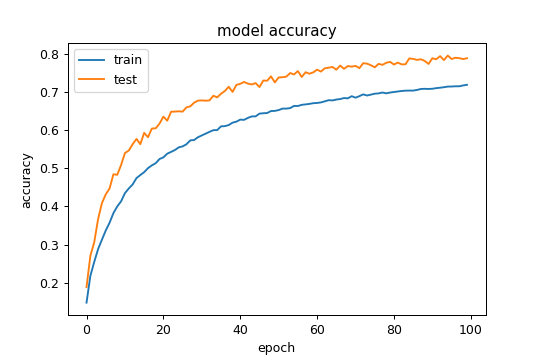

In [60]:
%matplotlib notebook
%matplotlib notebook

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


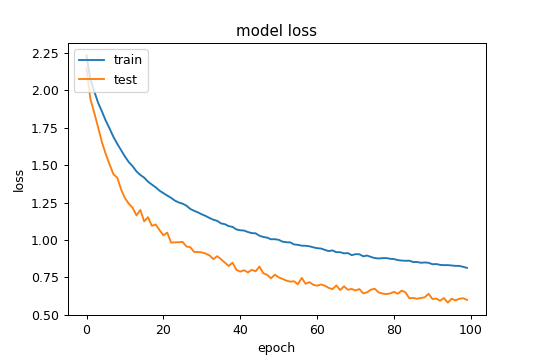

In [61]:
%matplotlib notebook
%matplotlib notebook

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(X_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
conf_mx = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
conf_mx

array([[747,  31,  13,  17,  14,   4,   9,  12,  91,  62],
       [  0, 925,   0,   2,   0,   4,   3,   1,   7,  58],
       [ 49,  10, 599,  42, 103,  64,  87,  16,  14,  16],
       [  6,   9,  32, 580,  35, 210,  72,  17,  23,  16],
       [  9,   0,  20,  32, 805,  38,  57,  25,   7,   7],
       [  2,   8,  14,  88,  37, 796,  18,  19,   6,  12],
       [  1,   7,  11,  38,  26,  23, 868,   2,  10,  14],
       [  4,   4,  11,  22,  60,  77,  12, 785,   4,  21],
       [ 27,  30,   3,   9,   2,   6,   4,   2, 888,  29],
       [  9,  70,   3,   7,   0,   3,   5,   1,   9, 893]])

In [63]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array
from keras.models import model_from_json

%matplotlib inline

# Scratch Model
weights_path = 'cifar10_weights_sgd100_7L_aug2.h5'
model_path = 'cifar10_architecture_sgd100_7L_aug2.json'

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [64]:
import scipy

def preprocess_image(image_path, preprocess_input, resize_shape):
    img = load_img(image_path)
    img = img_to_array(img)
    img = scipy.misc.imresize(img, size=resize_shape)
    img = preprocess_input(img)
    return img

In [65]:
with open(model_path, 'r') as model_json:
    loaded_model = model_from_json(model_json.read())

loaded_model.load_weights(weights_path)
print("Scratch Model Loaded")

Scratch Model Loaded


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

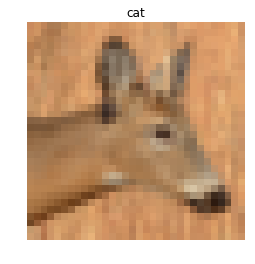

In [66]:
img = preprocess_image('images/deer.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'horse')

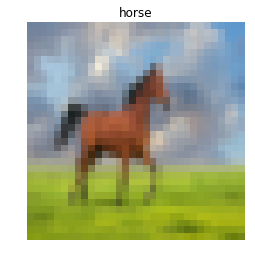

In [67]:
img = preprocess_image('images/horse.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

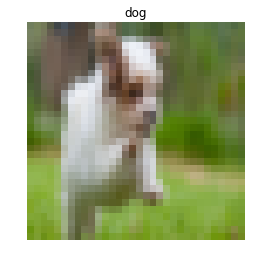

In [68]:
img = preprocess_image('images/dog.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'cat')

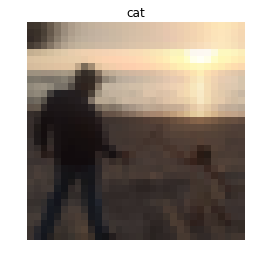

In [69]:
img = preprocess_image('images/dinesh.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

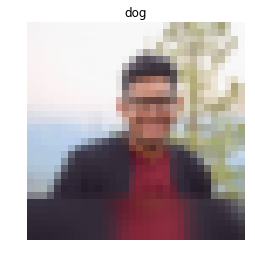

In [70]:
img = preprocess_image('images/hari.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'dog')

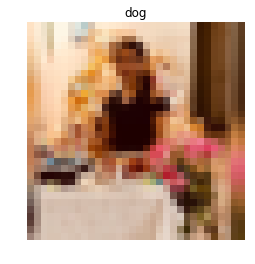

In [71]:
img = preprocess_image('images/pavani.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'automobile')

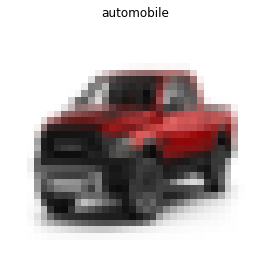

In [72]:
img = preprocess_image('images/car.jpg', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Text(0.5,1,'truck')

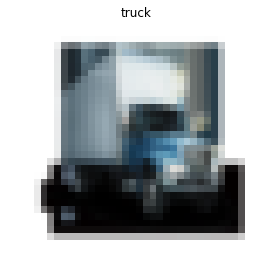

In [73]:
img = preprocess_image('images/truck.png', lambda x: x/255, (32, 32, 3))
pred = label_names[np.argmax(loaded_model.predict(np.expand_dims(img, axis=0)))]

plt.axis('off')
plt.imshow(img)
plt.title(pred)

## References
https://github.com/JacobPolloreno/cifar10_keras<br>
Deep Learning with Keras by Antonio Gulli and Sujit Pal<br>
http://www.samyzaf.com/ML/cifar10/cifar10.html<br>
https://github.com/charlesgreen/keras_cifar10_cnn/blob/master/keras_cifar10_cnn/cifar10_cnn.py<br>
https://machinelearningmastery.com/image-augmentation-deep-learning-keras/<br>
https://www.kernix.com/blog/a-toy-convolutional-neural-network-for-image-classification-with-keras_p14